                                                                                               Hurgland-Nick KELIET

### Skills added :  
 >- Machine Learning ( Linear Regression without Sklearn) 
 >- Generation of a Dataset
 >- Implementation of the linear model
 >- Cost function implementation: Mean Squared Error (MSE)
 >- Implementation of Gradient and Gradient Descent
 >- Learning curve
 >- Coefficient of determination

                                        REGRESSION LINEAIRE AVEC NUMPY

# Chargement des librairies

In [1]:
# Numpy
import numpy as np

# Générer un data set avec des valeur aléatoires
from sklearn.datasets import make_regression

#Créer des graphes et visualiser nos données avec Matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import de la librairie plotly
from plotly import __version__

# Affiche la bibliothèque graphique intégré à Notebook
%matplotlib inline

# Import warnings
import warnings
warnings.filterwarnings("ignore")

# Génération d'un Dataset

- dataset : (x,y) avec *m* exemples, n variables

In [2]:
# Make_regression nous permet de générer des données 2 tableaux que on va nommée x et y
# (nombre de tableau) = make_regression(nombre d'échantillons, nombre de features ou var dépendantes et bruit)
x,y = make_regression(n_samples = 100,n_features = 1, noise = 10)

- observation du dataset

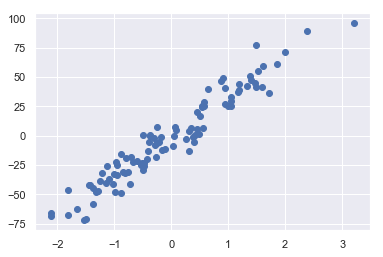

In [3]:
# plt.scatter(abscisse, ordonées)
plt.scatter(x,y)

In [4]:
# Dimension de la matrice (la taille de matrice sera (100, 1))
print(x.shape)

# print(y.shape) Dimension de la matrice (la taille de matrice sera (100,)) on se doit de la reshape
# De manière dégeu y = y.reshape(100,1)
# De manière propre
y = y.reshape(y.shape[0],1) 

# Dimension de y
print(y.shape)

(100, 1)
(100, 1)


In [5]:
# Création de la matrice X (rempli de 1)
# np.hstack nous permet de coller 2 vecteur à côté de l'autre
X = np.hstack((x, np.ones(x.shape)))
X.shape

(100, 2)

In [6]:
# Initialisons théta avec des valeur aléatoires
# np.random.rand(dimension exemple 2,1) nous permet de générer des nombres aléatoires 
# parce que notre vecteur contient seulement 2 éléments a et b pusique régréssion linéaire ax+b
# Qui nous donne l'erreur la plus petite
theta = np.random.rand(2,1)

In [7]:
# Dimension théta
theta.shape

(2, 1)

In [8]:
# Print théta
theta

array([[0.31322355],
       [0.01004189]])

# Implémentation du modèle linéaire

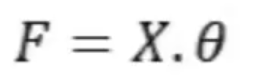

In [9]:
from IPython.display import Image, display
Image("modèle_lineaire.png", width = 100 , height = 300)

In [10]:
def model(X,theta):
    return X.dot(theta)

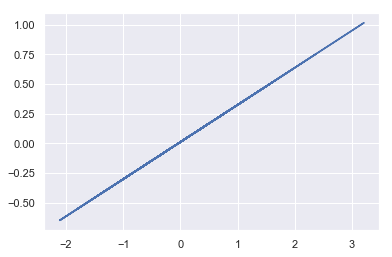

In [11]:
# Testons si l'on a pas fait d'érreur sur la fonction et affichons par rapport à notre dataset x
plt.plot(x,model(X,theta))
# Si la régression est déscendante nous savons un paramètre théta négatif sinon positif

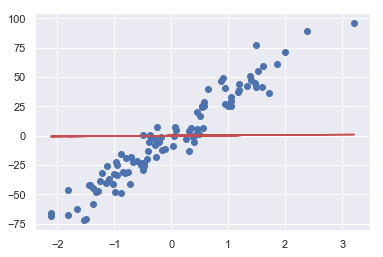

In [12]:
# Si on trace notre dataset par dessus notre modèle (notre modèle est en bleu)
# c='r' change la couleur du modèle
plt.scatter(x,y)
plt.plot(x,model(X,theta), c='r')

# !!!!!! Résulat catastrophique que nous devons régler

# Implémentation de la fonction coût : Mean Squared Error (MSE)

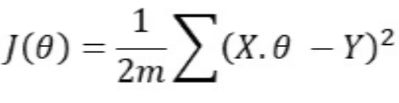

In [13]:
from IPython.display import Image, display
Image("Fonctioncout.png", width = 200 , height = 400)

In [14]:
def cost_function(X, y, theta):
    m = len(y)
    return (1/(2*m) * np.sum((model(X,theta) - y)**2))

In [15]:
cost_function(X, y, theta)

702.2816221263455

In [16]:
# La fonction coût est l'erreur quadratique moyen (least square)

# Implémentation du Gradient et de la Descente de Gradient

 * Gradient

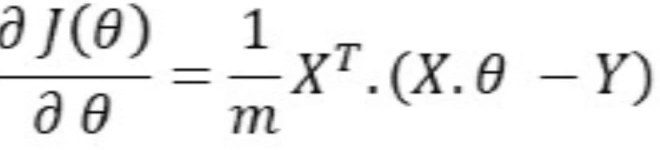

In [17]:
from IPython.display import Image, display
Image("Gradient.png", width = 200 , height = 400)

In [18]:
def grad(X, y, theta):
    m = len(y)
    return (((1/m)*X.T).dot(model(X,theta) - y))

In [19]:
grad(X, y, theta)

array([[-39.03685342],
       [  2.13700195]])

 * Descente Gradient

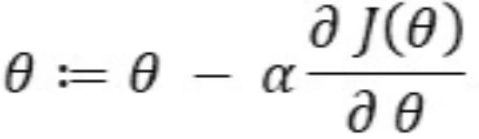

In [20]:
from IPython.display import Image, display
Image("DescenteGradient2.png", width = 200 , height = 400)

In [21]:
def gradient_descente(X, y, theta, learning_rate, n_iterations):
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        
    return theta

# Machine Learning

In [22]:
# Si le modèle ne marche pas il faut jouer avec le learning rate soit (0.001, apres 0.01)
theta_final = gradient_descente(X, y, theta, learning_rate =0.01, n_iterations=1000)

In [23]:
theta_final
# Nous avon le paramètre a et b.

array([[33.6565039 ],
       [-1.03321993]])

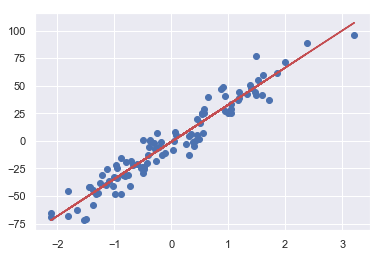

In [24]:
# Vérifions si il nous donne de bon résultat
prediction = model(X,theta_final)

# Notre dataset
plt.scatter(x,y)

#Notre graphe
plt.plot(x,prediction, c='r')

# Courbe d'apprentissage

- Vérifier si la machine réussit à bien apprendre

In [25]:
# Rajoutons dans notre descente de gradient cost history  que on initialise à 0
def gradient_descente(X, y, theta, learning_rate, n_iterations):
    # Un tableau rempli de 0
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        # On enregistre le cout de notre modèleà chaque itération
        cost_history[i] = cost_function(X, y, theta)
    return theta,cost_history

In [26]:
theta_final, cost_history = gradient_descente(X, y, theta, learning_rate =0.10, n_iterations=1000)
theta_final

array([[33.65678326],
       [-1.03303425]])

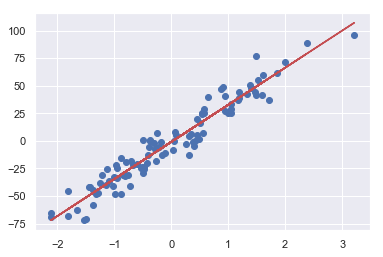

In [27]:
# Vérifions si il nous donne de bon résultat
prediction = model(X,theta_final)

# Notre dataset
plt.scatter(x,y)

#Notre graphe
plt.plot(x,prediction, c='r')

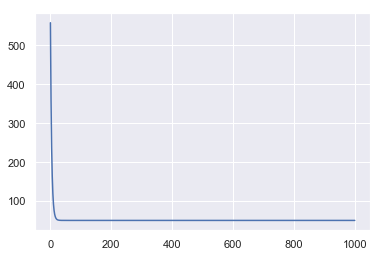

In [28]:
plt.plot(range(1000), cost_history)
# A travers les 100. itération, on voit comment la machine à réussit à minimiser les opérations
# Et passer les 250-300 itérations le cout n'a plus diminué
# On aurait pu arréter l'itération au alentour de 400 itérations.
# Ce qui aurait permis à la machine d'économiser du temps et de l'énergie

# Coefficient de détermination

- Evaluer la performance de notre modèle en utilisant le coefficient de détermination
    - Plus il est proche de 1, plus il rentre bien dans notre point

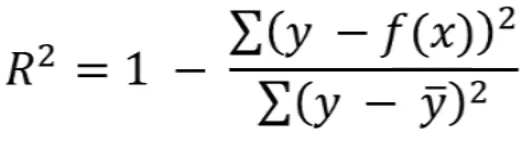

In [29]:
from IPython.display import Image, display
Image("Coefficient_de_determination.png", width = 200 , height = 400)

In [30]:
def coef_determination(y, pred):
    #Résidu des carrées
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [31]:
coef_determination(y, prediction)

0.9293050194862922

                                                                                                                Fin